In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

In [14]:
# import cleaned path
clean_df_path = 'clean.csv'

# pandas read csv
clean_df = pd.read_csv(clean_df_path)

# preview
clean_df.head(1)

,race_date,race_city,race_no,race_type,race_sex_group,race_age_group,race_race_group,race_length,race_track_type,race_track_condition,...,horse_owner,horse_trainer,horse_race_degree,horse_win_value,horse_psf_rate,horse_psf_rank,Horse_starting_box_no,horse_margin,horse_late_start,horse_rate
0,2024-01-01,Bursa,1,Condition 2,Undefined,3 Years Old,English,1400,Dirt,Good Going,...,NİMET ARİF KURTEL,TAMER TURAN,1.31.26,1.5,49,1,1,9 Lengths,NaN,42


In [30]:
# 1. The winning rate horse_sex  (f/ m)? undefine? 
female_horse = clean_df[clean_df['horse_sex'] == 'f']

win_female_rate_df = female_horse.groupby('result')['result'].sum()
win_female_rate_df

result
0        0
1      153
2      346
3      558
4      752
5      915
6     1032
7     1078
8     1144
9     1035
10     890
11     671
12     492
13     351
14     280
15     180
16      48
17      51
18      36
Name: result, dtype: int64

In [31]:
male_horse = clean_df[clean_df['horse_sex'] == 'm']

win_male_rate_df = male_horse.groupby('result')['result'].sum()
win_male_rate_df

result
0        0
1      328
2      612
3      882
4     1160
5     1450
6     1482
7     1435
8     1304
9     1215
10    1010
11     869
12     600
13     377
14     294
15     120
16      80
17      34
18      36
Name: result, dtype: int64

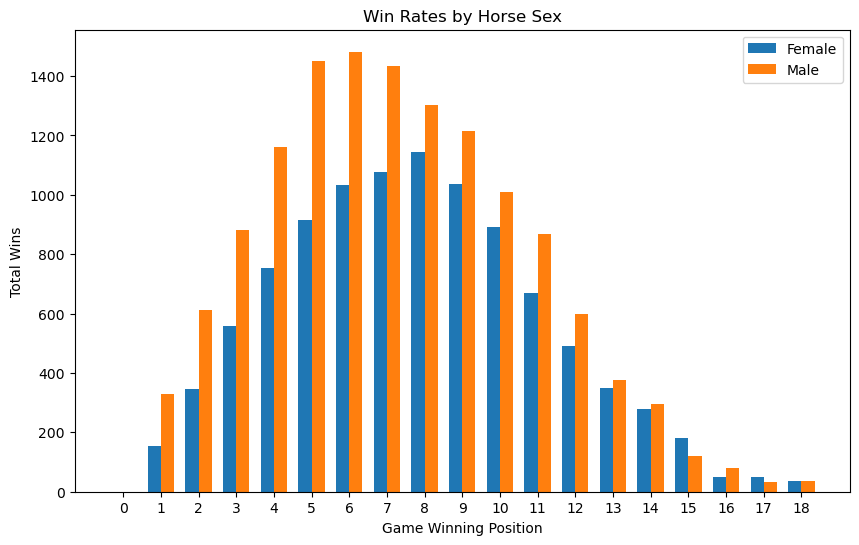

In [42]:
# chart width
plt.figure(figsize=(10, 6))

# Bar width
bar_width = 0.35

# Get the unique result categories
results = win_female_rate_df.index

# Plotting bars for female horses
plt.bar(results, win_female_rate_df, bar_width, label='Female')

# Plotting bars for male horses
plt.bar([r + bar_width for r in results], win_male_rate_df, bar_width, label='Male')

# Adding labels and title
plt.xlabel('Game Winning Position')
plt.ylabel('Total Wins')
plt.title('Win Rates by Horse Sex')
plt.xticks([r + bar_width / 2 for r in range(len(results))], results)
plt.legend()

# Show plot
plt.show()


In [ ]:
# 2. How does the win value vary with race length?

In [ ]:
# 3. The winning rate based on the horse age group? 

In [ ]:
# 4. Name of the Horse ranking based on the horse age group?

In [ ]:
# 5. Who are the top 10 horse trainers by the number of wins?